# Task 1: Linear Regression - Diabetes Prediction
This notebook demonstrates a **linear regression-based approach** (via logistic regression) to predict the likelihood of diabetes using health data.

## 1. Load and Explore the Data

In [4]:
#Load & Explore the Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Overview
print(df.head())
print(df.info())
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

## 2. Visualize the Data

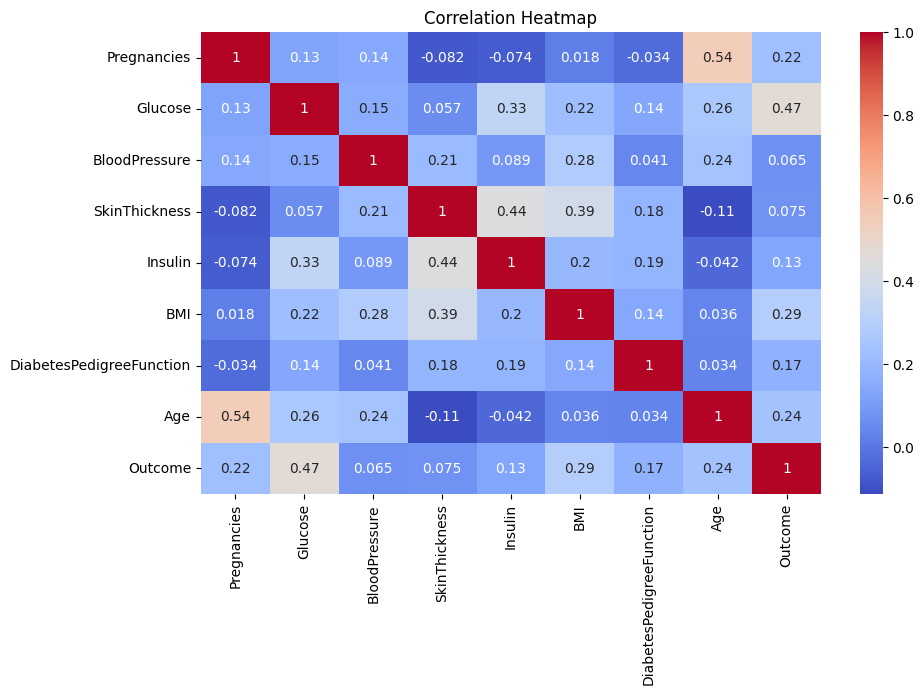

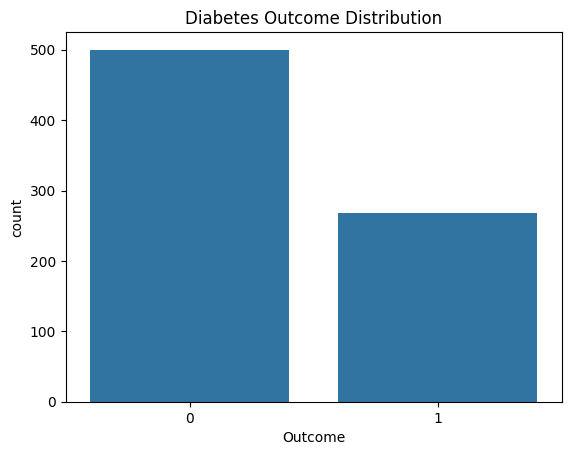

In [5]:
#Data Visualization & Interpretation
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


## 3. Feature Engineering

In [17]:
# Feature Engineering

# Replace biologically implausible zeroes with NaN
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, pd.NA)

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Ensure object columns are properly converted
df = df.infer_objects(copy=False)


## 4. Preprocessing and Standardization

In [7]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5. Linear Regression with Gradient Descent (SGDClassifier)

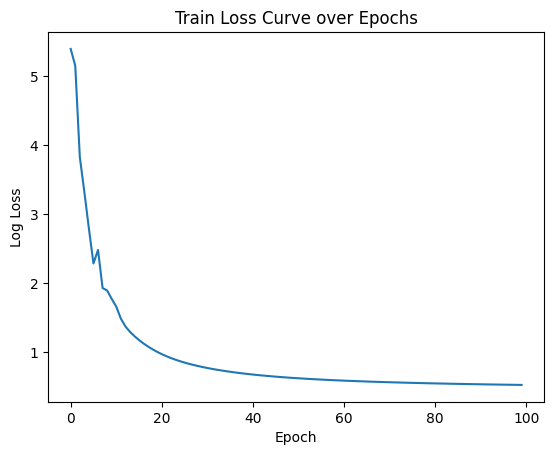

In [8]:
#Linear Regression Model + Loss Curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Using SGD for gradient descent
sgd = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=42)

loss_values = []

for i in range(1, 101):
    sgd.partial_fit(X_train_scaled, y_train, classes=[0,1])
    y_train_prob = sgd.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_train_prob)
    loss_values.append(loss)

# Plot Loss Curve
plt.plot(loss_values)
plt.title("Train Loss Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()


## 6. Plot Train Loss Curve

In [9]:
# Model Comparisons

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.7532
Decision Tree: Accuracy = 0.7078
Random Forest: Accuracy = 0.7468


## 7. Scatter Plot (Before Model Fit)

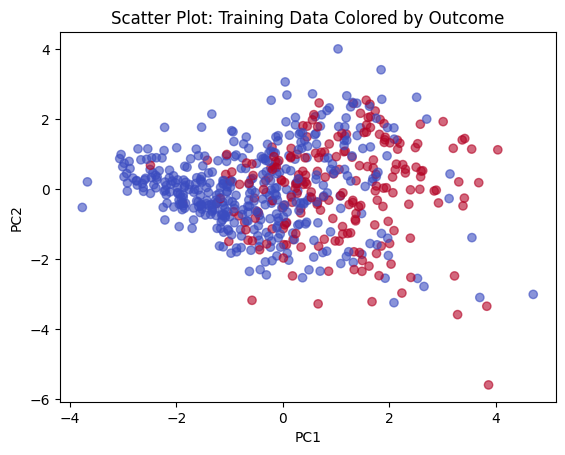

In [10]:

from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Before: just show scatter
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title("Scatter Plot: Training Data Colored by Outcome")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 8. Model Comparison: Logistic Regression vs Decision Tree vs Random Forest

In [11]:
# Save Best Model

import joblib

best_model = models["Random Forest"]
joblib.dump(best_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## 9. Save the Best Performing Model

In [12]:
# 9. Save the Best Performing Model

joblib.dump(best_model, "best_model.pkl")
print("✅ Best model saved as 'best_model.pkl'")


✅ Best model saved as 'best_model.pkl'


## 10. Prediction Script Using Saved Model

In [ ]:
# Load the trained model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl') 

# Sample input
sample_input = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Feature names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert to DataFrame to retain feature names
sample_df = pd.DataFrame(sample_input, columns=columns)

# Scale the input
sample_input_scaled = scaler.transform(sample_df)

# Predict
prediction = model.predict(sample_input_scaled)

print("Prediction (0 = No Diabetes, 1 = Diabetes):", prediction[0])


Prediction (0 = No Diabetes, 1 = Diabetes): 1
